In [1]:
# import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Hiển thị dữ liệu
actress = pd.read_json("actress.json")
actress.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都


In [3]:
df = actress[['bust','waist','hip','height','blood_type']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        6456 non-null   float64
 1   waist       6436 non-null   float64
 2   hip         6428 non-null   float64
 3   height      5012 non-null   float64
 4   blood_type  3171 non-null   object 
dtypes: float64(4), object(1)
memory usage: 437.1+ KB


In [4]:
# xóa những dòng dữ liệu bị thiếu
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        2678 non-null   float64
 1   waist       2678 non-null   float64
 2   hip         2678 non-null   float64
 3   height      2678 non-null   float64
 4   blood_type  2678 non-null   object 
dtypes: float64(4), object(1)
memory usage: 125.5+ KB


In [5]:
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,A
2,96.0,55.0,85.0,168.0,B
3,80.0,59.0,82.0,162.0,O
4,82.0,55.0,89.0,162.0,A
6,85.0,60.0,88.0,165.0,A


In [6]:
# hiển thị các loại nhóm máu
df.blood_type.value_counts()

A     1100
O      939
B      422
AB     217
Name: blood_type, dtype: int64

In [7]:
# chuyển dữ liệu về dạng số
mapper = {'O':0 , 'A':1, 'B':2, 'AB':3}
df['blood_type'] = df['blood_type'].map(mapper)
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


In [8]:
# convert về dạng numpy
actress_np = df.to_numpy()
actress_np

array([[ 90.,  58.,  86., 157.,   1.],
       [ 96.,  55.,  85., 168.,   2.],
       [ 80.,  59.,  82., 162.,   0.],
       ...,
       [ 83.,  58.,  85., 165.,   0.],
       [ 88.,  58.,  87., 153.,   0.],
       [ 88.,  59.,  86., 161.,   2.]])

In [9]:
# Ta chưa biết tập dữ liệu này phải phân thành bao nhiêu cụm
# Nên sử dụng thuật toán KMeans để phân thành 5 cụm trước
k_mean_5 = KMeans(n_clusters = 5)
k_mean_5.fit(actress_np)
label_5 = k_mean_5.labels_

In [10]:
label_5

array([4, 3, 0, ..., 3, 4, 3])

In [11]:
# đánh giá độ chính xác của tập dữ liệu vừa train
metrics.silhouette_score(actress_np,label_5,metric="euclidean")

0.23750075572884666

In [12]:
metrics.calinski_harabasz_score(actress_np,label_5)

1065.2063432339353

In [15]:
# sử dụng vòng for để xem cái nào tối ưu nhất
# sử dụng phương pháp cùi trỏ để tìm ra điểm tối ưu
sum_distance = []
k = range(1,15)
for i in k:
    k_mean = KMeans(n_clusters = i)
    k_mean.fit(actress_np)
    sum_distance.append(k_mean.inertia_)

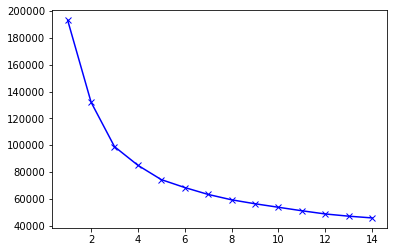

In [19]:
plt.plot(k,sum_distance, 'bx-')
plt.show()

In [20]:
# Nhìn vào biểu đồ với phương pháp cùi trỏ thì n_clusters = 3 sẽ tối ưu nhất
k_mean_3 = KMeans(n_clusters = 3)
model = k_mean_3.fit(actress_np)
result = model.labels_

In [21]:
result

array([2, 0, 1, ..., 1, 2, 1])

In [22]:
# đánh giá độ chính xác của tập dữ liệu vừa train
metrics.silhouette_score(actress_np,result,metric="euclidean")

0.30422441591177096

In [23]:
metrics.calinski_harabasz_score(actress_np,result)

1271.406189608148

In [29]:
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


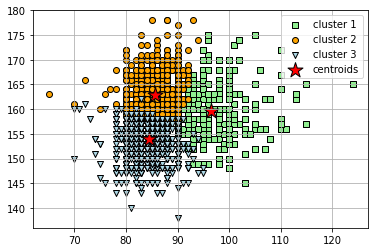

In [33]:
# vẽ biểu đồ phân cụm thể hiện sự phân tán của dữ liệu
plt.scatter(
    actress_np[result == 0, 0],
    actress_np[result == 0, 3],
    c = 'lightgreen', #màu
    marker = 's',     #kí hiệu s = square
    edgecolor = 'black', #boder
    label = 'cluster 1' #tên nhãn
)
plt.scatter(
    actress_np[result == 1, 0],
    actress_np[result == 1, 3],
    c = 'orange',
    marker = 'o',
    edgecolor = 'black',
    label = 'cluster 2'
)
plt.scatter(
    actress_np[result == 2, 0],
    actress_np[result == 2, 3],
    c = 'lightblue',
    marker = 'v',
    edgecolor = 'black',
    label = 'cluster 3'
)
plt.scatter(
    model.cluster_centers_[:, 0],
    model.cluster_centers_[:, 3],
    s=250,
    marker = '*',
    c = 'red',
    edgecolor = 'black',
    label = 'centroids'
)

plt.legend(scatterpoints=1) # chú thích
plt.grid()
plt.show()

### input: vòng1, vòng2, vong3, chiều cao, nhóm máu -> thuộc cụm nào?

In [36]:
df1 = actress[['id','bust','waist','hip','height','blood_type']]
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 146.5+ KB


In [37]:
df2 = actress[['id','name','japanName']]
df2.head()

,id,name,japanName
0,3,Kitagawa Yui,北川ゆい
1,4,Akira,Akira
2,6,Cocolo,COCOLO
3,8,Saiko,Saiko
4,11,Aida Momo,あいだもも


In [41]:
# nối 2 bảng
df3 = df1.merge(df2, on='id', how='left')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2677
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
 6   name        2678 non-null   object 
 7   japanName   2678 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 188.3+ KB


In [42]:
df3['cluster'] = result
df3.head()

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
0,4,90.0,58.0,86.0,157.0,A,Akira,Akira,2
1,6,96.0,55.0,85.0,168.0,B,Cocolo,COCOLO,0
2,8,80.0,59.0,82.0,162.0,O,Saiko,Saiko,1
3,11,82.0,55.0,89.0,162.0,A,Aida Momo,あいだもも,1
4,17,85.0,60.0,88.0,165.0,A,Aduki Miyu,あづき美由,1


In [72]:
def reconmend(model, vong1, vong2, vong3, chieu_cao, nhom_mau):
    arr = np.array([[vong1, vong2, vong3, chieu_cao, nhom_mau]])
    pred = model.predict(arr)
    return df3[df3['cluster'] == pred[0]].sample(10)

In [75]:
vong1 = 90
vong2 = 62
vong3 = 88
chieu_cao = 164
nhom_mau = 0 #nhóm máu O
reconmend(model, vong1, vong2, vong3, chieu_cao, nhom_mau)


,id,bust,waist,hip,height,blood_type,name,japanName,cluster
242,13203,90.0,59.0,89.0,165.0,A,Tominaga Runa,富永ルナ,1
591,18897,88.0,58.0,85.0,160.0,A,Sezaki Runa,瀬咲るな,1
218,1315,87.0,58.0,84.0,161.0,A,Ogata Reina,緒方れいな,1
2300,5424,83.0,59.0,84.0,170.0,B,Sahara Mariko,沙原真理子,1
1620,1014312,88.0,60.0,85.0,168.0,O,Hyoumaru,豹丸,1
1238,1000194,86.0,58.0,86.0,160.0,A,Tatibana Koharu,たちばな小春,1
797,21639,88.0,58.0,86.0,160.0,A,Konisi Nana,小西那奈,1
1074,26978,90.0,57.0,88.0,162.0,O,Aoki Haru,青木春,1
405,15901,83.0,60.0,86.0,163.0,O,Morino Marina,森野まりな,1
1852,4201,90.0,58.0,85.0,158.0,O,Kozima Mina,小島三奈,1
